In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
en_stop = stopwords.words('english')
import re

# Read data

In [2]:
df = pd.read_csv('../data/news_2020.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    366 non-null    object
 1   News    366 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [4]:
df.head()

Date  \
0  1 Jan, 2020   
1  2 Jan, 2020   
2  3 Jan, 2020   
3  4 Jan, 2020   
4  5 Jan, 2020   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

# Clean data

In [5]:
def get_news_list(text):
    news_list = []
    text = text.strip('][')
    for t in text.split(','):
        tokens = t.strip('\'\'')
        news_list.append(tokens) 
    return news_list

In [6]:
df['news_list'] = df['News'].apply(lambda x :get_news_list(x))

In [7]:
def get_individual_news(news):
    global actual_df
    for i in news:
        temp = {'News':i}
        actual_df = actual_df.append(temp, ignore_index=True)

In [8]:
actual_df = pd.DataFrame(columns={'News'})
df['news_list'].apply(lambda x :get_individual_news(x))

0      None
1      None
2      None
3      None
4      None
       ... 
361    None
362    None
363    None
364    None
365    None
Name: news_list, Length: 366, dtype: object

In [9]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239008 entries, 0 to 239007
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   News    239008 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [10]:
actual_df.head()

,News
0,Shivin Narang injures his hand on the set of his show
1,'Allergy cases on the rise in Bengaluru
2,'A grand Hanukkah celebration held in the city
3,'I respect my competitors
4,because they bring out the best in me: Yash


In [11]:
actual_df.drop_duplicates(subset ="News", inplace = True)

In [12]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226757 entries, 0 to 239007
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   News    226757 non-null  object
dtypes: object(1)
memory usage: 3.5+ MB


In [32]:
def clean_text(text):
    # remove html entities
    text = re.sub(r"&+\w*;+"," ", text)
    # make lower
    text = text.lower()
    # remove extra space
    text = ' '.join([i for i in text.split() if len(i)>2])
    return text

In [33]:
actual_df['clean_news'] = actual_df['News'].apply(lambda x: clean_text(x))

In [34]:
actual_df['clean_news'].sample(5)

13988     'andhra’s poorest ‘bought’ land worth 220 crore amaravati
212424                                 pawan kalyan canvass for bjp
207546                                  short hours pmc schools for
224608                       'qualcomm announces iot services suite
83150                                   'spurned midnight karnataka
Name: clean_news, dtype: object

In [35]:
def createWordCloud(data):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = en_stop,
                min_font_size = 10).generate(' '.join(data))
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

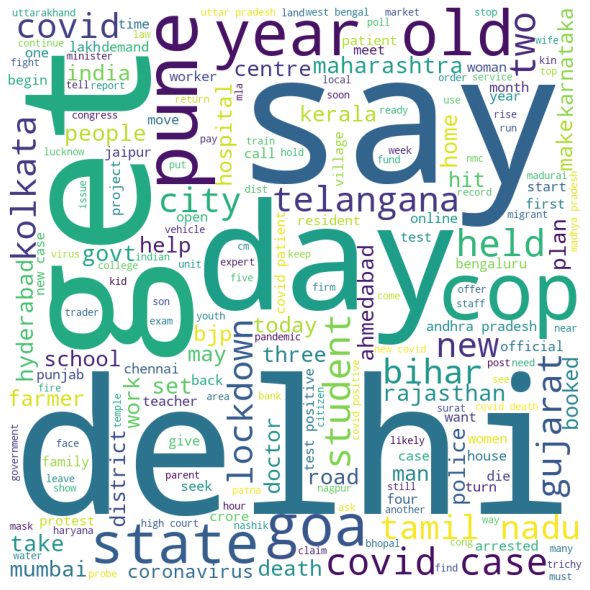

In [36]:
createWordCloud(actual_df['clean_news'])

In [40]:
actual_df.to_csv('../data/individual_news_2020.csv', index=False)

In [41]:
df2 = pd.read_csv('../data/individual_news_2020.csv')

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226757 entries, 0 to 226756
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   News        226756 non-null  object
 1   clean_news  226565 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [43]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226757 entries, 0 to 239007
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   News        226757 non-null  object
 1   clean_news  226757 non-null  object
dtypes: object(2)
memory usage: 15.2+ MB
